## Reinforcement Learning
###  Q-Learning using Table and Simple Neural Network

- Originally by Arthur Juliani: [github DeepRL-Agents](https://github.com/awjuliani/DeepRL-Agents)
- Revised by YoungJun Kim

### 1. Import
- tensorflow >= 1.2
- gym: Open-AI gym. set up envrionments for RL problem examples

In [1]:
from __future__ import absolute_import, division, print_function
import gym 
import random, os, sys, time
import numpy as np
from tqdm import tqdm_notebook
import tensorflow as tf
import matplotlib.pyplot as plt
from IPython.display import clear_output
%matplotlib inline

#### Frozen Lake Problem
- Possible States: 4x4 grid /
    S: Start /
    G: Goal /
    F: Frozen Ground(Safe) /
    H: Hole (Dangerous)
- Possible Action: [Left, Down, Right, Up]
- Noise: Wind disrupts action
- Reward: 0 for each state, 1 for reaching the Goal

In [2]:
# load environment for Frozen-Lake problem
env = gym.make('FrozenLake-v0')
env.render()


SFFF
FHFH
FFFH
HFFG


### 2. Q-Table learning
- Initialize: 16x4 Q-table with value 0
- Observe: Make greedy choices with current value and get reward for each choice
- Update: Update current Q-value with newly gained returns
- Repeat 3-steps by num_episodes

In [3]:
## Initialize 16x4 Q-table padded with all-zeroes ##
Q_table = np.zeros([env.observation_space.n,env.action_space.n])

## hyperparameters ##
alpha = .8          # step_size parameter
g = .95             # discount_factor
num_episodes = 2000 # num_of_episodes = num_of_value_updates 

j_List = []  # list for steps per episode (max_step: 99)
reward_List = []  # list for total rewards

## training ##
for i in tqdm_notebook(range(num_episodes), desc="episode"):
    
    #Reset environment and get first new observation
    state = env.reset()
    reward_All = 0
    done = False
    j = 0
    
    #The Q-Table learning algorithm
    while j < 99:
        j+=1  #increase steps
        
        #Choose an action by greedily (with noise, similar to e-greedy approach) picking from Q table
        action = np.argmax(Q_table[state,:] + np.random.randn(1,env.action_space.n)*(1./(i+1)))
        
        #Get new state and reward from environment
        next_state,reward,done,_ = env.step(action)
        
        # Update Q-Table with new knowledge (SARSA)
        Q_table[state,action] = Q_table[state,action] + alpha*(reward + g*np.max(Q_table[next_state,:]) 
                                                               - Q_table[state,action])
        
        reward_All += reward # append reward
        state = next_state   # move to next state
        
        # if episode reaches the end point, break the loop
        if done == True:
            break
    
    # append episode full step info and reward info to each list     
    j_List.append(j)
    reward_List.append(reward_All)

In [4]:
# average reward for whole episodes
print("Score over time: " +  str(sum(reward_List)/num_episodes))

Score over time: 0.5025


In [5]:
# Final Q-Table
print("Final Q-Table Values")
print(Q_table)

Final Q-Table Values
[[7.19021882e-02 7.04346776e-03 7.80488789e-03 6.58100517e-03]
 [1.97579553e-03 1.23418474e-03 1.08139328e-03 8.05309639e-02]
 [2.14290859e-03 9.80997088e-02 0.00000000e+00 5.71226001e-03]
 [1.48681604e-04 1.00923710e-03 5.49162587e-05 5.41631615e-02]
 [7.54443006e-02 6.92486661e-04 3.36353393e-03 4.12602879e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.11425717e-01 5.50090461e-06 1.01590217e-04 1.74441573e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 4.71109466e-04 1.97349584e-03 1.06775142e-01]
 [2.69560123e-03 4.13235311e-01 5.84064732e-04 0.00000000e+00]
 [8.23227033e-01 0.00000000e+00 7.90833693e-04 3.20385358e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [9.04744155e-03 2.38090567e-03 5.04549870e-01 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 6.14400000e-03 5.94921169e-01]
 [0.00000000e+00 0.00000000e+00 0.

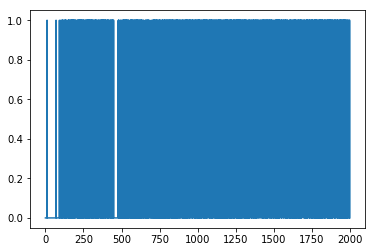

In [6]:
# how reward changed over episodes
plt.plot(reward_List)

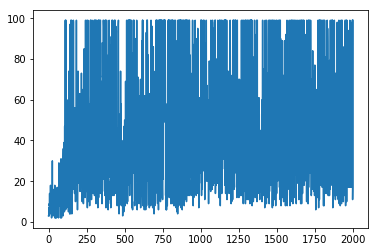

In [7]:
# how step numbers changed over episodes
plt.plot(j_List)

In [8]:
## Simulation ##
clear_cells = True

# array for assigning action
possible_action = ["Left", "Down", "Right", "Up"]
j = 0
state = env.reset()
env.render()

while j < 99:
    j+=1  #increase steps
    action = np.argmax(Q_table[state,:]) 
    next_state,_,done,_ = env.step(action)
    
    if clear_cells:
        clear_output(wait=True)
        print("Step: {}, Current State:{}, Action:{}, Next state:{}".format(j, state, possible_action[action], next_state))
        env.render()
        time.sleep(1.0)
        
    else:
        env.render()
        
    state = next_state

    # check if reached the goal or holes
    if done == True:
        if state == 15:
            print("You win! Total steps: {}".format(j))
        else:
            print("Game Over! Total steps: {}".format(j))
        break

Step: 3, Current State:4, Action:Left, Next state:0
  (Left)
SFFF
FHFH
FFFH
HFFG


KeyboardInterrupt: 

In [9]:
test_num = 20
win = 0
for i in range(test_num):
    state = env.reset()
    done = False
    j = 0
    while j < 99:
        j +=1 
        action = np.argmax(Q_table[state,:]) 
        next_state,_,done,_ = env.step(action)
        state = next_state
        if done:
            if state == 15:
                win += 1
            break
print("Win Rate : {}/{}".format(win, test_num))

Win Rate : 8/20


### 3. Q-Network
- Approximate Value function with weight
- Calculate Loss by subtracting Target Q from Predicted Q value
- Optimize with Gradient Descent Algorithm 

In [10]:
### Graphing ###

main_graph = tf.Graph()
with main_graph.as_default():
    
    with tf.name_scope("forward_propagation"):
        # input: state as one-hot vector
        inputs = tf.placeholder(shape=[1,16], dtype=tf.float32, name="State")

        # weight: initialize with random values
        W = tf.Variable(tf.random_uniform(shape=[16,4], minval=0, maxval=0.01, dtype=tf.float32), name="Weight")

        # Predicted Q value: dot(input, weight)
        predicted_Q = tf.matmul(inputs, W, name="Q")

        # Prediction: Maximum Q-value
        predicted_action = tf.argmax(predicted_Q, axis=1, name="Action")

    with tf.name_scope("Loss_Optimizer"):
        # Q-value Calculated with Bellman Equation
        target_Q = tf.placeholder(shape=[1,4], dtype=tf.float32, name="Target_Q")

        # Sum-squared Error between Target Q and Predicted Q
        loss = tf.reduce_sum(tf.square(target_Q - predicted_Q), name="Loss")

        # Gradient Descent Optimizer
        trainer = tf.train.GradientDescentOptimizer(learning_rate=0.1, name="Optimizer")

        # Update W
        updateModel = trainer.minimize(loss, name="Update")
    
    with tf.name_scope("writer"):
        # write graph & Weight at log directory
        logdir="./log"

        if not os.path.exists(logdir):
            os.mkdir(logdir)
        
        tf.summary.histogram('Weight', W)
        tf.summary.scalar('Loss', loss)
        writer = tf.summary.FileWriter(logdir="./log", graph=main_graph)
        summary = tf.summary.merge_all()
        
        saver = tf.train.Saver()
      
    # initializer
    init = tf.global_variables_initializer()
    

In [11]:
### Training ###

## Set learning parameters ##
g = .99             # discount factor
e = 0.1             # epsilon: for epsilon-greedy approach
num_episodes = 2000 # num of episodes

## create lists to contain total rewards and steps per episode ##
jList = []
rList = []

with tf.Session(graph=main_graph) as sess:
    
    # initailze the model
    sess.run(init)
    
    # keep track of global step
    global_step = 0
    
    for i in tqdm_notebook(range(num_episodes), desc='Episode'): # loop for the whole episode
        
        #Reset environment and get first new observation
        state = env.reset()
        reward_All = 0
        done = False
        j = 0
        
        #The Q-Network
        while j < 99: # loop for each episode
            
            # increase local and global step
            j+=1
            global_step+=1
            
            # state as one-hot vector
            state_input = np.identity(16)[state:state+1]
            
            # get Q value and action from the Network
            action, all_Q = sess.run([predicted_action,predicted_Q],feed_dict={inputs:state_input})
            
            # for the probability below epsilon, take random approach
            if np.random.rand(1) < e:
                action[0] = env.action_space.sample()

            # Get new state and reward from environment
            next_state, reward, done, _ = env.step(action[0])
            
            # Obtain the Q' values by feeding the new state through our network
            next_state_input = np.identity(16)[next_state:next_state+1]
            next_Q = sess.run(predicted_Q,feed_dict={inputs:next_state_input})
            
            # Obtain maxQ' and set our target value for chosen action.
            max_next_Q = np.max(next_Q)
            targetQ = all_Q
            targetQ[0,action[0]] = reward + g*max_next_Q
            
            # comparing Q(s, a) and Reward + Q(s', a') from the same network
            # Train our network using target and predicted Q values
            # add summary of Graph and Weight variables
            _, curr_summ = sess.run([updateModel, summary], feed_dict={inputs:state_input,target_Q:targetQ})
            writer.add_summary(curr_summ, global_step=global_step)
            
            reward_All += reward
            state = next_state
            
            if done == True:
                e = 1./((i/50) + 10) # Reduce chance of random action as we train the model.
                break
                
        jList.append(j)
        rList.append(reward_All)

    # save final weight value at checkpoint
    saver.save(sess, os.path.join(logdir, "model.ckpt"))
    
print("Percent of succesful episodes: " + str(sum(rList)/num_episodes) + "%")


Percent of succesful episodes: 0.472%


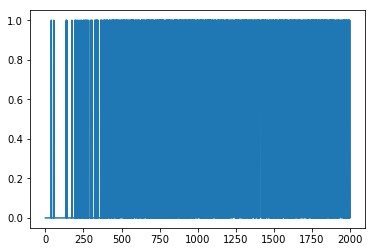

In [12]:
plt.plot(rList)

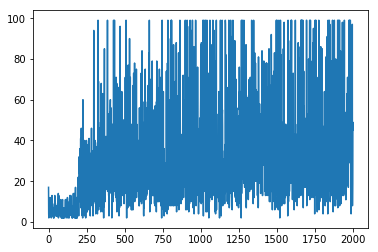

In [13]:
plt.plot(jList)

In [19]:
### simulation ###
for i in range(5):
    with tf.Session(graph=main_graph) as sess:

        possible_action = ["Left", "Down", "Right", "Up"]

        ckpt = tf.train.get_checkpoint_state(logdir)
        saver.restore(sess, ckpt.model_checkpoint_path)

        state = env.reset()
        done = False
        j = 0
        env.render()

        while j < 99:
            j+=1

            # state as one-hot vector
            state_input = np.identity(16)[state:state+1]

            # get Q value and action from the Network
            action = sess.run(predicted_action,feed_dict={inputs:state_input})
            next_state,_,done,_ = env.step(action[0])

            if clear_cells:
                clear_output(wait=True)
                print("Step: {}, Current State:{}, Action:{}, Next state:{}".format(j, state, possible_action[action[0]], next_state))
                env.render()
                time.sleep(1.0)

            else:
                env.render()

            state = next_state
            if done == True:
                if state == 15:
                    print("You win! Total steps: {}".format(j))
                else:
                    print("Game Over! Total steps: {}".format(j))
                break
                
                #time.sleep(1.0)


Step: 30, Current State:14, Action:Right, Next state:15
  (Right)
SFFF
FHFH
FFFH
HFFG
You win! Total steps: 30


In [15]:
test_num = 20
win = 0
with tf.Session(graph=main_graph) as sess:
    ckpt = tf.train.get_checkpoint_state(logdir)
    saver.restore(sess, ckpt.model_checkpoint_path)
    for i in range(test_num):
        state = env.reset()
        done = False
        j = 0
        while j < 99:
            j +=1
            state_input = np.identity(16)[state:state+1]
            action = sess.run(predicted_action,feed_dict={inputs:state_input})
            next_state,_,done,_ = env.step(action[0])
            state = next_state
            if done:
                if state == 15:
                    win += 1
                break
print("Win Rate : {}/{}".format(win, test_num))

INFO:tensorflow:Restoring parameters from ./log/model.ckpt
Win Rate : 17/20


### Reference & Original Code

Post: https://medium.com/@awjuliani/simple-reinforcement-learning-with-tensorflow-part-0-q-learning-with-tables-and-neural-networks-d195264329d0

Github: https://github.com/awjuliani/DeepRL-Agents